In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from func2graph import data, models, tools

torch.Size([10, 30000])


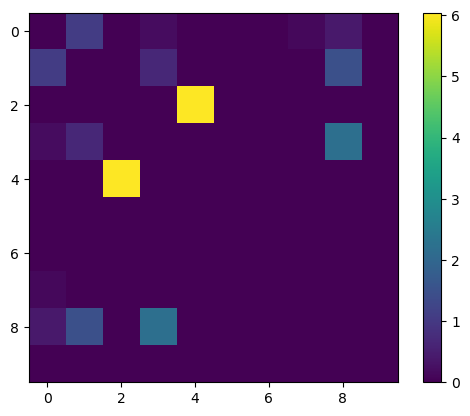

In [3]:
neuron_num = 10
dt = 0.001
tau = 0.3

spike_neuron_num = 2
spike_input = 5

weight_scale = 5
init_scale = 0.1

total_time = 30000
random_seed = 42

weight_type = "nearest_neighbor"

train_data_size = 20000
window_size = 200
batch_size = 32

trainloader, validloader, weight_matrix = data.generate_simulation_data(
    neuron_num=neuron_num,
    dt=dt,
    tau=tau,
    spike_neuron_num=spike_neuron_num,
    spike_input=spike_input,
    weight_scale=weight_scale,
    init_scale=init_scale,
    total_time=total_time,
    random_seed=random_seed,
    weight_type=weight_type,
    train_data_size=train_data_size,
    window_size=window_size,
    batch_size=batch_size,
    data_type="prediction",
    predict_window_size=10,
)

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

In [4]:
hidden_size_1=128
h_layers_1=2
heads=1
attention_layers=1
hidden_size_2=64
h_layers_2=2

pos_enc_type="sin_cos"   # "none", "sin_cos", "embedding"

predict_mode_model = models.Attention_Autoencoder(
    neuron_num=neuron_num,
    window_size=window_size,
    hidden_size_1=hidden_size_1,
    h_layers_1=h_layers_1,
    heads=heads,
    attention_layers=attention_layers,
    hidden_size_2=hidden_size_2,
    h_layers_2=h_layers_2,
    prediction_mode=True,     ########################
    pos_enc_type=pos_enc_type,   ########################
    data_type = "prediction",    # "reconstruction" or "prediction"
    predict_window_size = 10,
)

In [7]:
checkpoint_path = "../../checkpoints/prediction/simpler_weight/sin_cos/epoch=18-step=11875.ckpt"
predictions, ground_truths, avg_attention, attentions = tools.get_avg_attention(trainloader, predict_mode_model, checkpoint_path, neuron_num)

print(predictions.shape)
print(ground_truths.shape)
print(avg_attention.shape)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A4000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at ../../checkpoints/prediction/simpler_weight/sin_cos/epoch=18-step=11875.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Loaded model weights from the checkpoint at ../../checkpoints/prediction/simpler_weight/sin_cos/epoch=18-step=11875.ckpt


Predicting DataLoader 0:   0%|          | 0/625 [00:00<?, ?it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   0%|          | 1/625 [00:00<00:02, 279.66it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   0%|          | 2/625 [00:00<00:01, 346.05it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   0%|          | 3/625 [00:00<00:01, 381.43it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   1%|          | 4/625 [00:00<00:01, 408.43it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   1%|          | 5/625 [00:00<00:01, 428.04it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   1%|          | 6/625 [00:00<00:01, 444.81it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   1%|          | 7/625 [00:00<00:01, 436.97it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   1%|▏         | 8/625 [00:00<00:01, 449.11it/s]torch.Size([1, 10, 128])
1
2
3
Predicting DataLoader 0:   1%|▏         | 9/625 [00:00<00:01, 456.05it/s]

PREDICT Profiler Report

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                      	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                       	|  -              	|  8781           	|  2.9946         	

(20000, 10, 10)
(20000, 10, 10)
(10, 10)


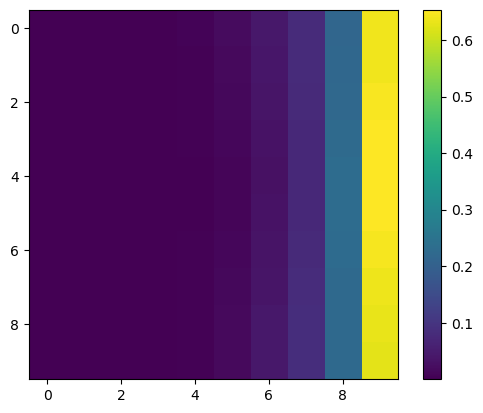

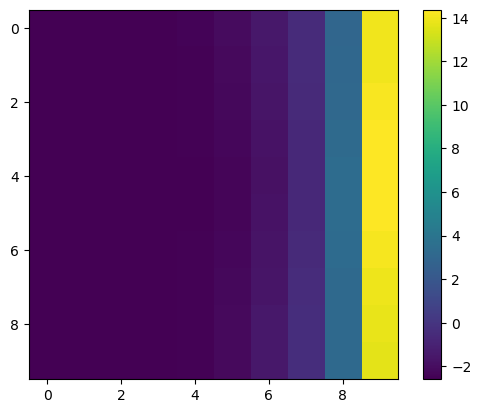

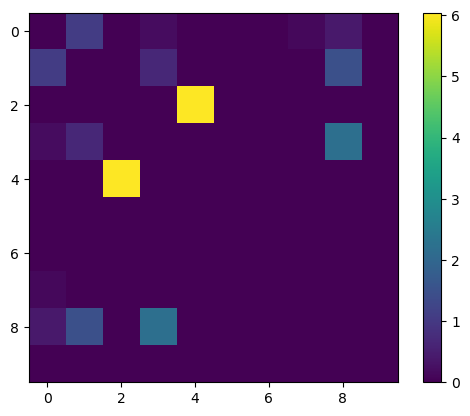

In [8]:
plt.imshow(avg_attention)
plt.colorbar()
plt.show()

# Normalize
mean = np.mean(avg_attention)
std = np.std(avg_attention)
normalized_avg_attention = (avg_attention - mean) / std

plt.imshow(normalized_avg_attention*weight_scale)
plt.colorbar()
plt.show()

plt.imshow(weight_matrix.detach().numpy())
plt.colorbar()
plt.show()

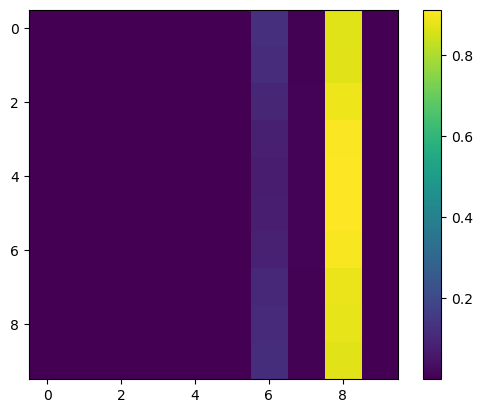

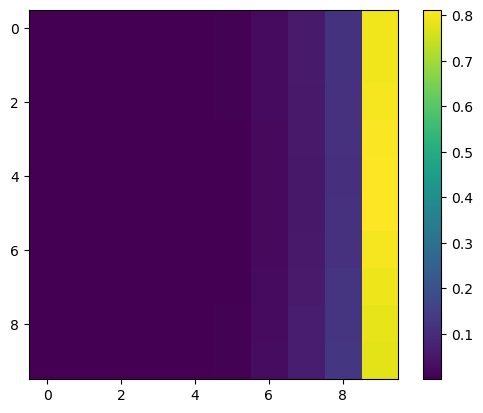

In [10]:
plt.imshow(attentions[0])
plt.colorbar()
plt.show()

plt.imshow(attentions[50])
plt.colorbar()
plt.show()

tensor(0.0397)


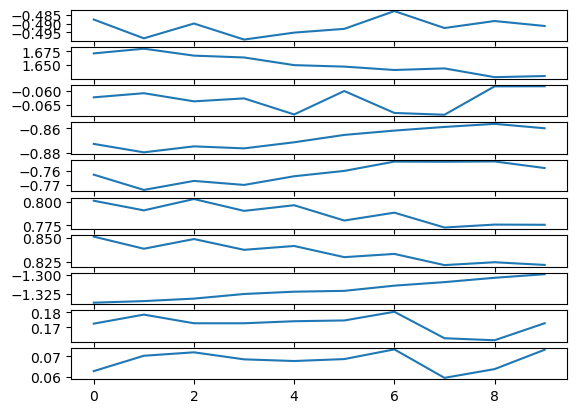

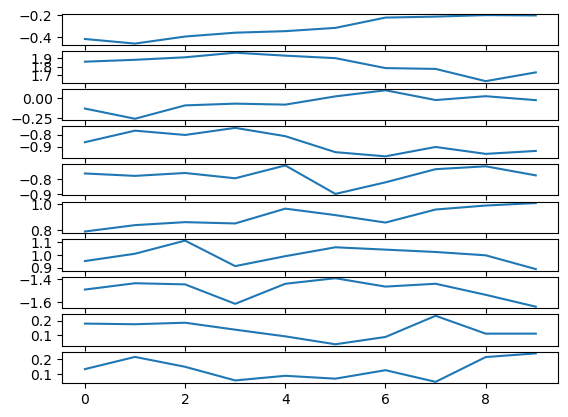

In [9]:
print(F.mse_loss(torch.from_numpy(predictions), torch.from_numpy(ground_truths), reduction="mean"))

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(predictions[2][i])
plt.show()

for i in range(neuron_num):
    plt.subplot(10, 1, i+1)
    plt.plot(ground_truths[2][i])
plt.show()